# Image Augmentation dengan Open CV
Gunakan foto rambu 'dilarang belok kiri'

In [ ]:
#import library
import cv2
import numpy as np
from PIL import Image
import os
import glob
from google.colab.patches import cv2_imshow #tidak perlu kalo di jupyter

Membaca gambar

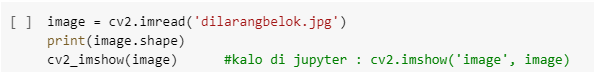

(225, 225, 3)


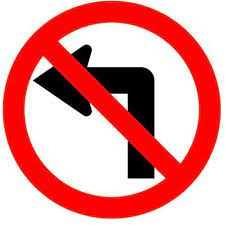

In [ ]:
#Ketik disini
image = cv2.imread('dilarangbelok.jpg')
print(image.shape)
cv2_imshow(image)

## Melihat isi tensor dari gambar
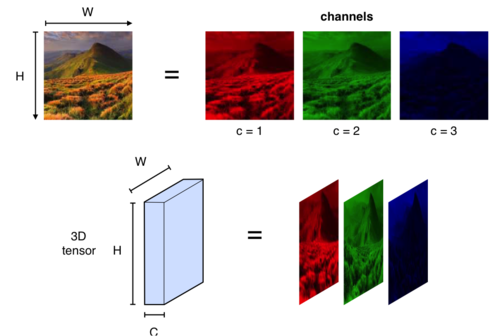

In [ ]:
#[:, :, 0] represents Blue channel
image[:, : , 0]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
#[:, :, 1] represents Green channel
image[1, :, 1]

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 254, 253, 251, 250, 249, 249, 251,
       252, 252, 252, 253, 253, 253, 254, 248, 251, 254, 255, 254, 248,
       242, 239, 253, 255, 255, 255, 255, 254, 252, 249, 232, 237, 242,
       247, 251, 252, 249, 243, 185, 173, 159, 139, 117,  97,  82,  73,
        52,  50,  48,  46,  44,  42,  41,  39,  37,  37,  39,  42,  43,
        46,  49,  52,  85,  95, 110, 130, 151, 171, 186, 197, 232, 240,
       244, 246, 247, 248, 246, 244, 232, 244, 253, 254, 254, 253, 255,
       255, 247, 250, 253, 255, 255, 255, 255, 255, 254, 254, 252, 253,
       251, 251, 251, 251, 253, 254, 254, 253, 251, 251, 251, 251, 251,
       253, 253, 254, 255, 255, 255, 255, 255, 255, 255, 255, 25

In [ ]:
#[:, :, 1] represents Red channel
image[1, :, 2]

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 254, 252, 251, 252, 252,
       254, 254, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 254, 253, 252, 246, 249, 254, 255, 255, 252,
       246, 239, 246, 247, 249, 251, 254, 255, 255, 255, 245, 250, 255,
       255, 255, 255, 255, 255, 246, 249, 238, 227, 215, 205, 198, 196,
       182, 183, 185, 185, 183, 181, 181, 181, 187, 189, 187, 185, 184,
       180, 176, 173, 197, 199, 207, 220, 236, 251, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 250, 255, 255, 255, 255, 251, 254,
       252, 243, 246, 249, 252, 251, 251, 250, 250, 252, 253, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 252, 249, 248, 248, 254, 255, 255, 255, 25

## Melakukan beberapa image augmentation

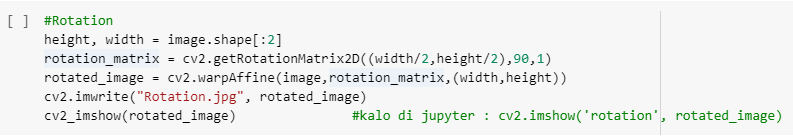

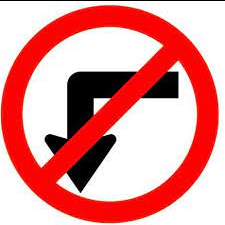

In [ ]:
#Ketik disini
height, width = image.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((width/2,height/2),90,1)
rotated_image = cv2.warpAffine(image,rotation_matrix,(width,height))
cv2.imwrite("Rotatio.jpg", rotated_image)
cv2_imshow(rotated_image)

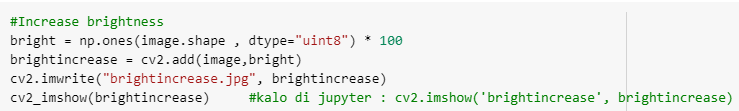

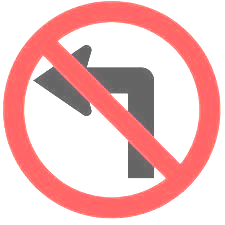

In [ ]:
#Ketik disini
bright = np.ones(image.shape, dtype="uint8") * 100
brightincrease = cv2.add(image,bright)
cv2.imwrite("brightincrease.jpg", brightincrease)
cv2_imshow(brightincrease)

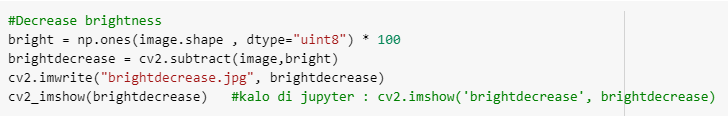

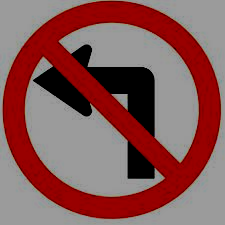

In [ ]:
#Ketik disini
bright = np.ones(image.shape, dtype="uint8") * 100
brightdecrease = cv2.subtract(image,bright)
cv2.imwrite("brighdecrease.jpg", brightdecrease)
cv2_imshow(brightdecrease)

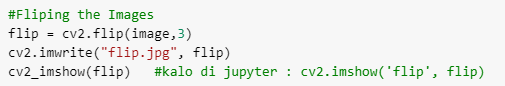

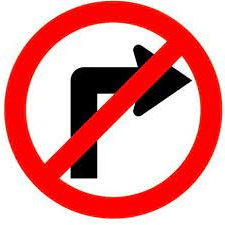

In [ ]:
#Ketik disini
flip = cv2.flip(image,3)
cv2.imwrite("flip.jpg", flip)
cv2_imshow(flip)

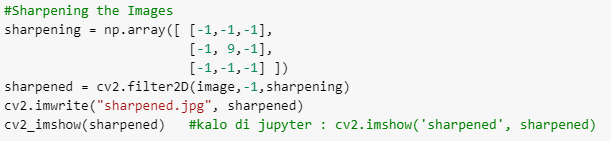

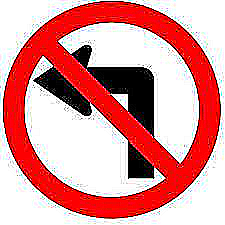

In [ ]:
#Ketik disini
sharpening = np.array([[-1,-1,-1],
                      [-1,9,-1],
                      [-1,-1,-1]])
sharpened = cv2.filter2D(image,-1,sharpening)
cv2.imwrite("sharpened.jpg", sharpened)
cv2_imshow(sharpened)

## Open discussion
Menurutmu, bolehkah semua image augmentation diterapkan untuk semua gambar? Mengapa?



# Klasifikasi dengan framework tensorflow

sumber : https://www.tensorflow.org/tutorials/images/classification

In [ ]:
#Import Library
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
#Load dataset
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 7s 0us/step


This tutorial uses a dataset of about 3,700 photos of flowers. The dataset contains five sub-directories, one per class:

```
flower_photo/
  daisy/
  dandelion/
  roses/
  sunflowers/
  tulips/
```

In [ ]:
#hitung total gambar
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


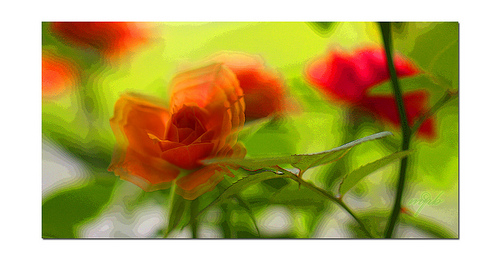

In [ ]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

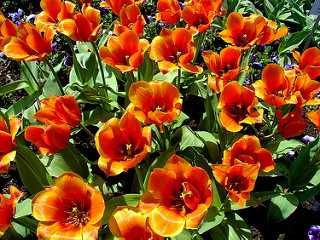

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [ ]:
#Membagi dataset
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


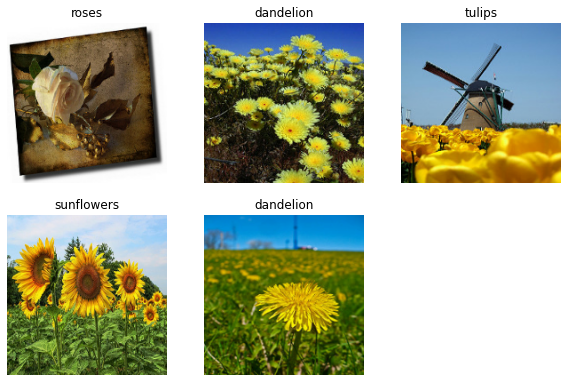

In [ ]:
class_names = train_ds.class_names
print(class_names)

#Visualisasi contoh gambar tiap kelas
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(5):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## Membuat model dengan data asli

In [ ]:
num_classes = 5

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [ ]:
epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
92/92 [==============================] - 88s 941ms/step - loss: 1.2916 - accuracy: 0.4445 - val_loss: 1.0400 - val_accuracy: 0.5858
Epoch 2/5
92/92 [==============================] - 83s 904ms/step - loss: 0.9694 - accuracy: 0.6270 - val_loss: 1.0051 - val_accuracy: 0.6213
Epoch 3/5
92/92 [==============================] - 85s 920ms/step - loss: 0.8065 - accuracy: 0.6952 - val_loss: 0.9335 - val_accuracy: 0.6485
Epoch 4/5
92/92 [==============================] - 83s 897ms/step - loss: 0.5917 - accuracy: 0.7807 - val_loss: 1.0185 - val_accuracy: 0.6403
Epoch 5/5
92/92 [==============================] - 84s 908ms/step - loss: 0.4137 - accuracy: 0.8542 - val_loss: 1.1243 - val_accuracy: 0.6540


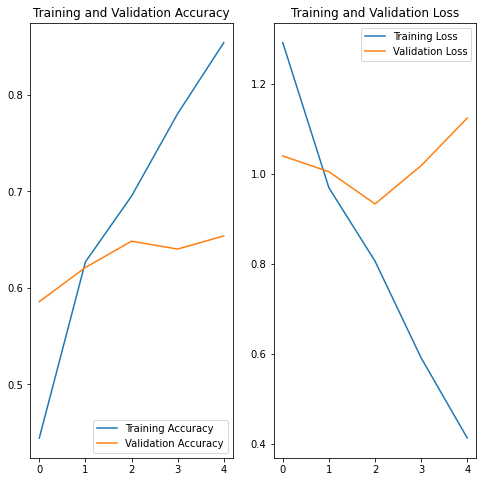

In [ ]:
#Visualisasi akurasi dan loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Membuat model dengan data yang ditambah image augmentation

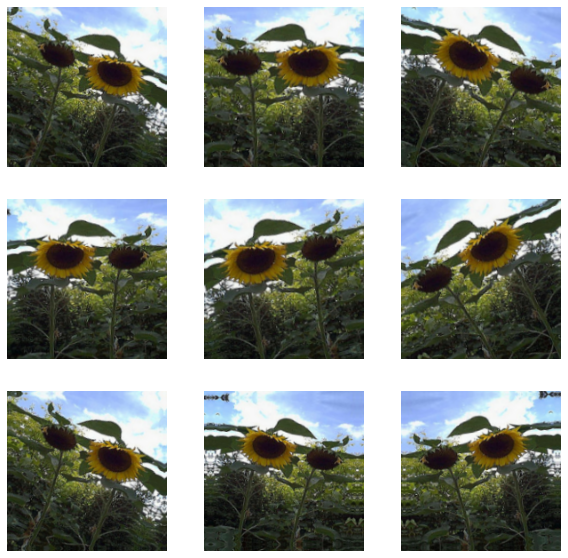

In [ ]:
#Dengan randomflip, random rotation, dan random zoom
data_augmentation = keras.Sequential(
  [layers.RandomFlip("horizontal",input_shape=(img_height,
                                  img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

#Visualisasikan contoh hasilnya
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
#Gunakan struktur model yang sama namun tambahkan data_augmentation di awalnya
model_withaug = Sequential([
  data_augmentation,                          
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model_withaug.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_withaug.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

In [ ]:
epochs = 5
history_withaug = model_withaug.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
92/92 [==============================] - 96s 1s/step - loss: 1.4286 - accuracy: 0.3736 - val_loss: 1.1892 - val_accuracy: 0.4809
Epoch 2/5
92/92 [==============================] - 94s 1s/step - loss: 1.1248 - accuracy: 0.5286 - val_loss: 1.0320 - val_accuracy: 0.5995
Epoch 3/5
92/92 [==============================] - 93s 1s/step - loss: 1.0164 - accuracy: 0.6025 - val_loss: 1.0324 - val_accuracy: 0.5995
Epoch 4/5
92/92 [==============================] - 95s 1s/step - loss: 0.9139 - accuracy: 0.6434 - val_loss: 0.9084 - val_accuracy: 0.6362
Epoch 5/5
92/92 [==============================] - 96s 1s/step - loss: 0.8515 - accuracy: 0.6686 - val_loss: 0.8599 - val_accuracy: 0.6540


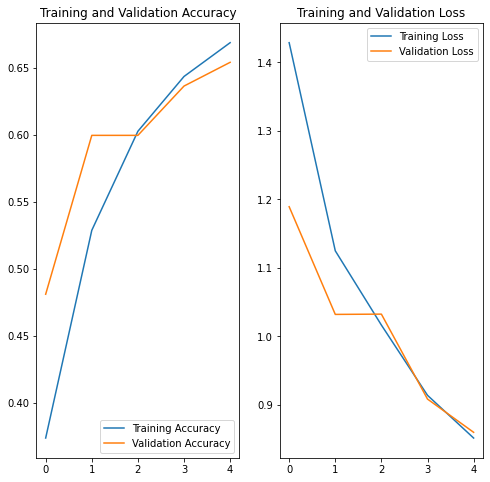

In [ ]:
#Visualisasi akurasi dan loss
acc = history_withaug.history['accuracy']
val_acc = history_withaug.history['val_accuracy']

loss = history_withaug.history['loss']
val_loss = history_withaug.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model_withaug = Sequential([                          
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model_withaug.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_withaug.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 22, 22, 64)       

In [ ]:
epochs = 5
history_withaug = model_withaug.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
92/92 [==============================] - 86s 922ms/step - loss: 1.4613 - accuracy: 0.3777 - val_loss: 1.1089 - val_accuracy: 0.5559
Epoch 2/5
92/92 [==============================] - 84s 910ms/step - loss: 1.0610 - accuracy: 0.5817 - val_loss: 1.0704 - val_accuracy: 0.5518
Epoch 3/5
92/92 [==============================] - 84s 906ms/step - loss: 0.9012 - accuracy: 0.6540 - val_loss: 0.9543 - val_accuracy: 0.5913
Epoch 4/5
92/92 [==============================] - 84s 913ms/step - loss: 0.7587 - accuracy: 0.7149 - val_loss: 1.0021 - val_accuracy: 0.6035
Epoch 5/5
92/92 [==============================] - 85s 925ms/step - loss: 0.5859 - accuracy: 0.7868 - val_loss: 0.9598 - val_accuracy: 0.6240


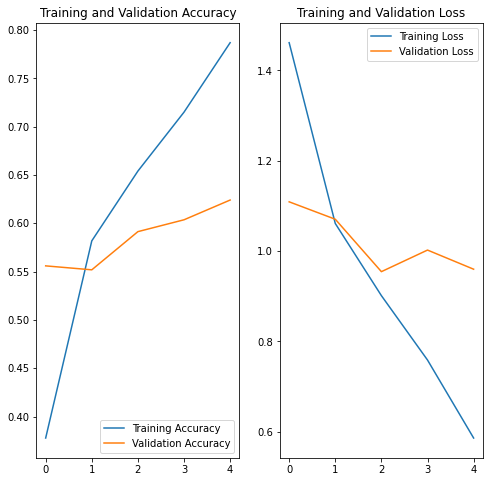

In [ ]:
#Visualisasi akurasi dan loss
acc = history_withaug.history['accuracy']
val_acc = history_withaug.history['val_accuracy']

loss = history_withaug.history['loss']
val_loss = history_withaug.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()